In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Angles_df = pd.DataFrame(pd.read_excel('Datasets/angles_data_PushUp.xlsx'))

## Check Dataframe

In [3]:
# Function to remove outliers based on standard deviation
def remove_outliers(df, columns, threshold=3):
    """
    Removes outliers from the specified columns in the DataFrame based on the given threshold.
    """
    for col in columns:
        q3 = df[col].quantile(0.90)  # Getting the third quartile (Q3)
        iqr = df[col].quantile(0.90) - df[col].quantile(0.10)  # Calculating IQR
        upper_bound = q3 + 1.5 * iqr  # Calculating upper bound

        df = df[df[col] <= upper_bound]  # Filtering values not exceeding the upper bound
    return df

In [4]:
def smooth_extreme_values(df, column, threshold_factor=1):
    for col in column:
        smoothed_values = []
        values = df[col].values
        for i in range(len(values)):
            if i == 0 or i == len(values) - 1:
                smoothed_values.append(values[i])
            else:
                diff_prev = abs(values[i] - values[i - 1])
                diff_next = abs(values[i] - values[i + 1])
                threshold = threshold_factor * diff_prev
                if diff_next > threshold:
                    smoothed_value = (values[i - 1] + values[i + 1]) / 2  # Replace with average of neighboring values
                    smoothed_values.append(smoothed_value)
                else:
                    smoothed_values.append(values[i])

        df[col] = smoothed_values
    return df

In [5]:
from scipy.signal import savgol_filter

# Assuming Angles_df is your DataFrame and 'column_names' contains the column names you want to smooth
def advanced_smoothing(df, column_names, window_length=5, polyorder=2):
    smoothed_df = df.copy()
    for col in column_names:
        smoothed_values = savgol_filter(df[col], window_length=window_length, polyorder=polyorder)
        smoothed_df[col] = smoothed_values
    return smoothed_df

In [6]:
# iter = 20
# 
# # Example usage
# for i in range(iter):
#     for j in range(iter):
#         if i >= j+1:
#             Angles_df1 = Angles_df.copy()  # Initialize a copy of the original DataFrame
#             Angles_df1 = remove_outliers(Angles_df1,Angles_df1.columns,j)
#             # Smooth the columns in Angles_df using Savitzky-Golay filter
#             smoothed_data = advanced_smoothing(Angles_df1, column_names=Angles_df1.columns, window_length=i, polyorder=j)
# 
#             Angles_df1 = smoothed_data
# 
#             plt.figure(figsize=(18, 6))  # Set figure size
# 
#             plt.plot(Angles_df1['Frame_Number'], Angles_df1['Angle_At_Right_Elbow'])
#             plt.xlabel('Frame Number')
#             plt.ylabel('Angle (degrees)')
# 
#             # Set unique title for each plot based on window_length and polyorder
#             plt.title(f'Window Length: {i}, Polyorder: {j}')
# 
#             plt.axhline(y=0, color='red', linestyle='--')
#             plt.axhline(y=360, color='red', linestyle='--')
#             plt.grid(True)
#             plt.show()

## smooth and remove outlier

In [7]:
Angles_df = remove_outliers(Angles_df, Angles_df.columns)
# Angles_df = advanced_smoothing(Angles_df, column_names=Angles_df.columns, window_length=8, polyorder=1)

## boxplot

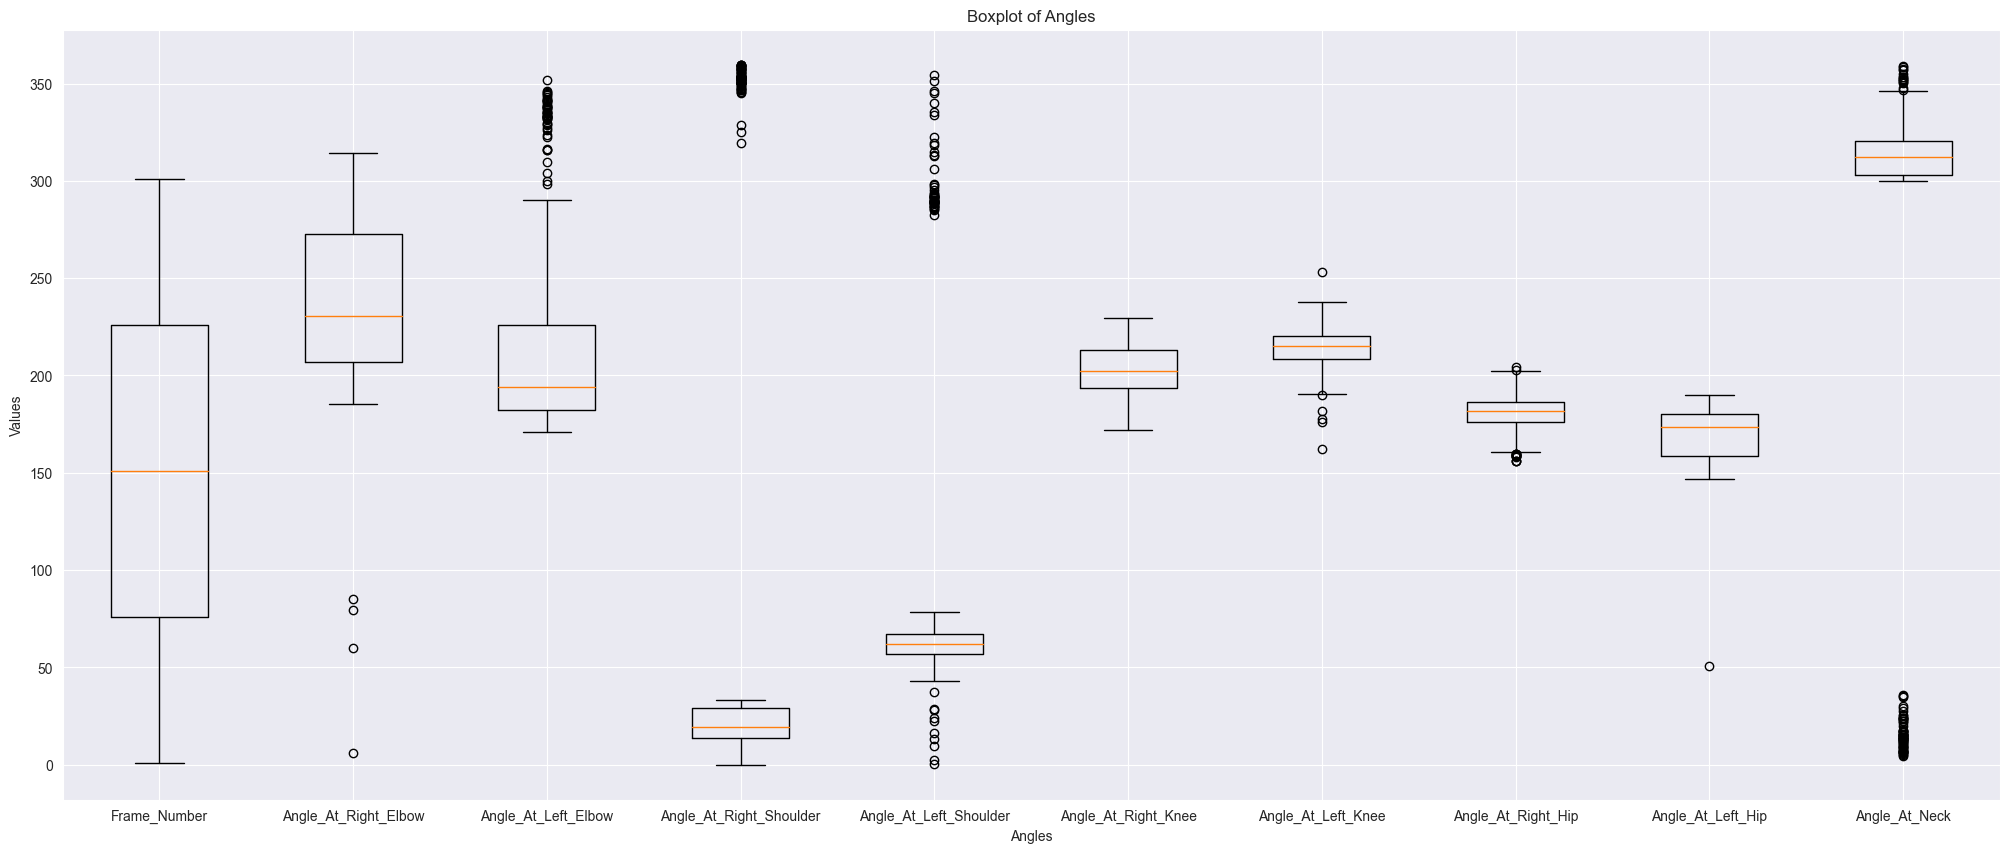

In [8]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot boxplots for each column (angle) against the frame number
plt.figure(figsize=(25, 10))  # Adjust figure size as needed
plt.boxplot(Angles_df.values, labels=Angles_df.columns)

plt.xlabel('Angles')
plt.ylabel('Values')
plt.title('Boxplot of Angles')
# plt.legend()
plt.grid(True)
plt.show()

## plot columns

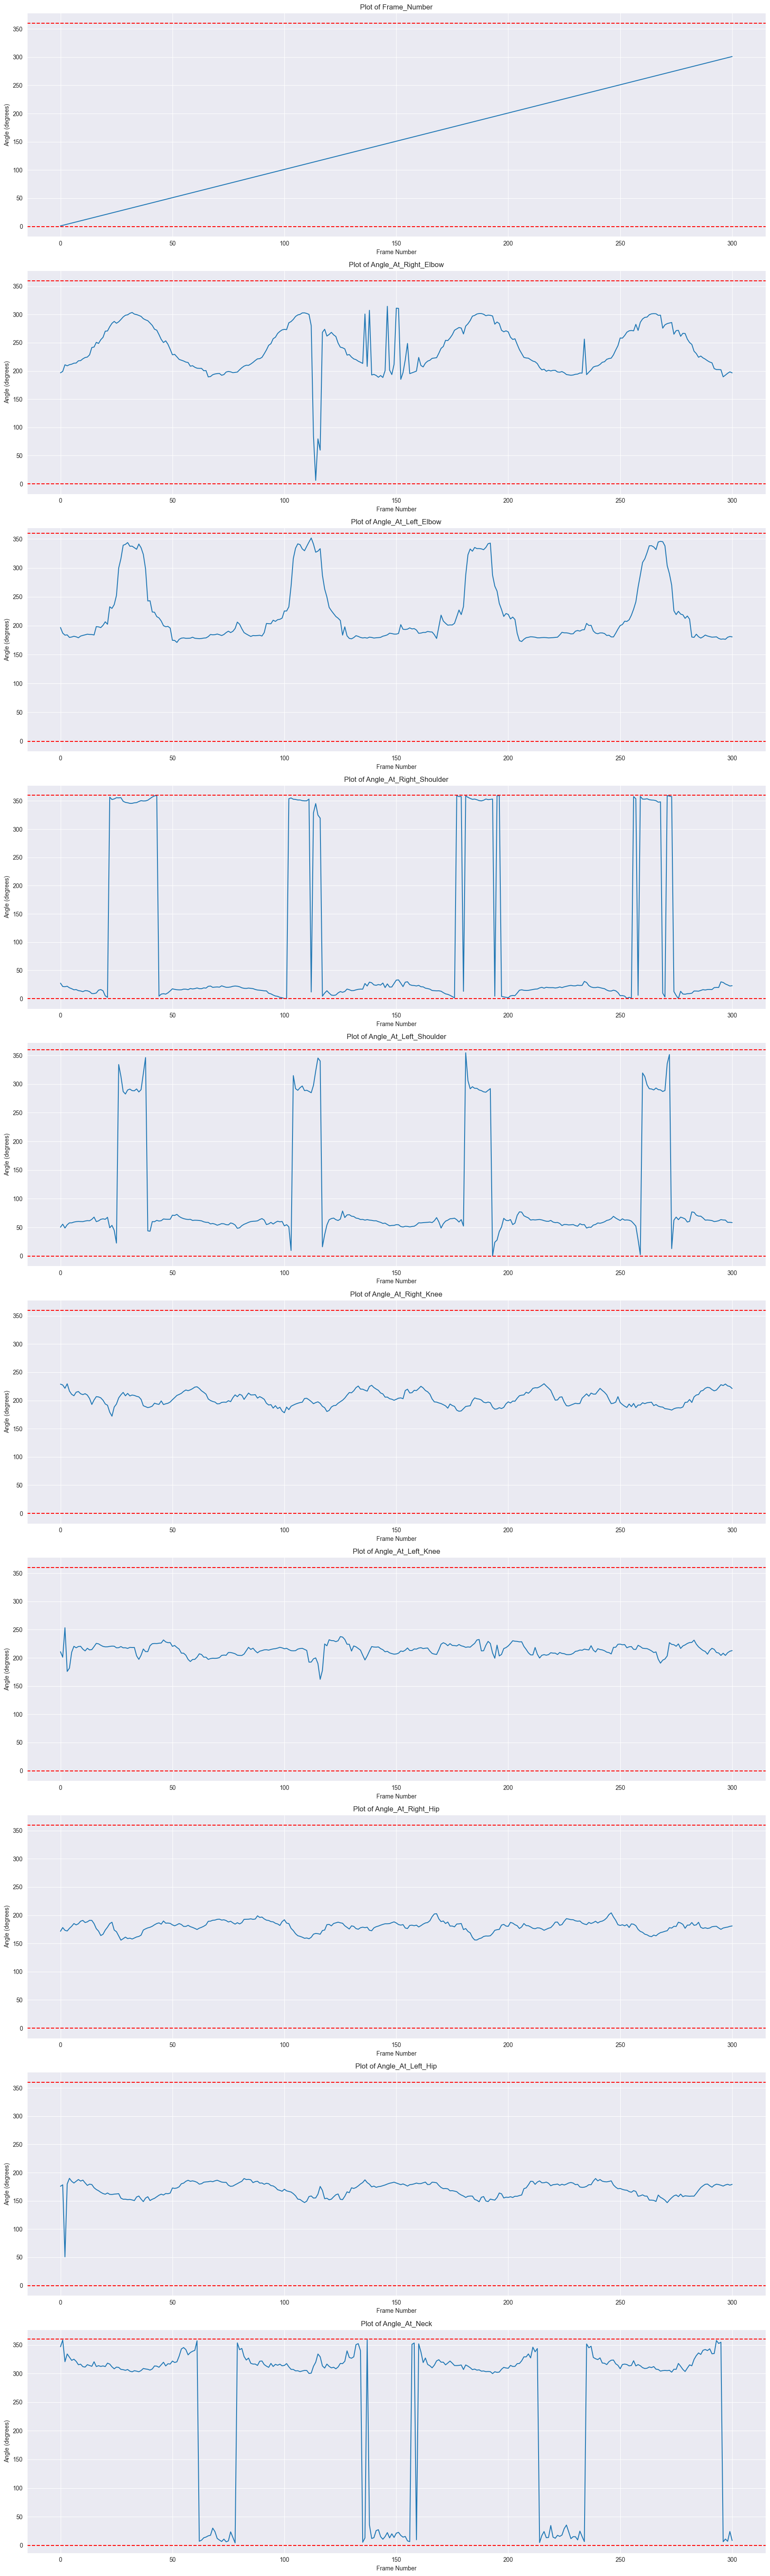

In [9]:
# Set 'Frame_Number' column as the index for easier plotting
Angles_df.set_index('Frame_Number', inplace=False)

# Plot each column (angle) against the frame number in separate subplots
fig, axes = plt.subplots(nrows=len(Angles_df.columns), ncols=1, figsize=(18, 6 * len(Angles_df.columns)))

for i, column in enumerate(Angles_df.columns):
    ax = axes[i] if len(Angles_df.columns) > 1 else axes  # Select the appropriate subplot
    ax.plot(Angles_df.index, Angles_df[column])
    ax.set_xlabel('Frame Number')
    ax.set_ylabel('Angle (degrees)')
    ax.set_title(f'Plot of {column}')
    ax.axhline(y=0, color='red', linestyle='--')
    ax.axhline(y=360, color='red', linestyle='--')
    ax.grid(True)

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

## seperate wave

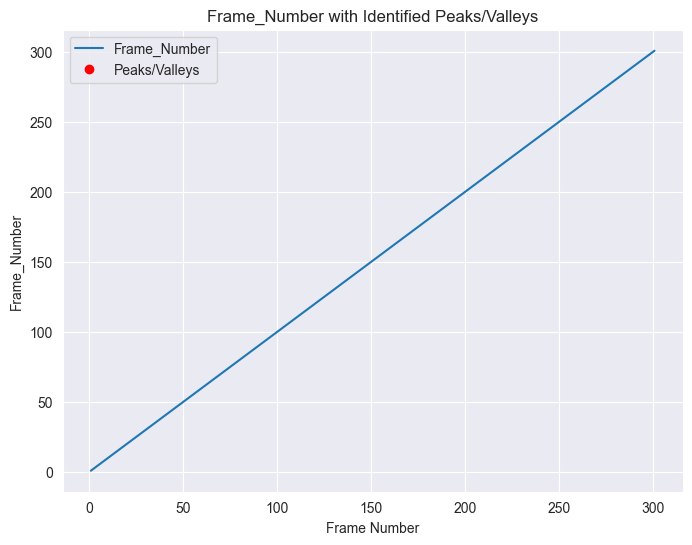

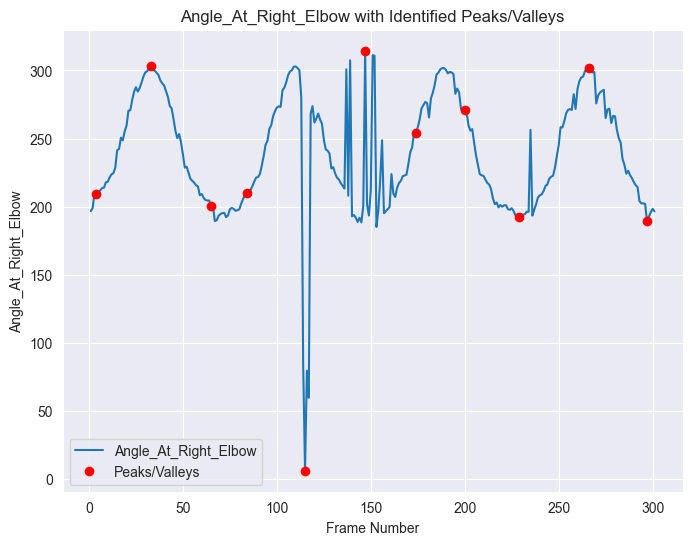

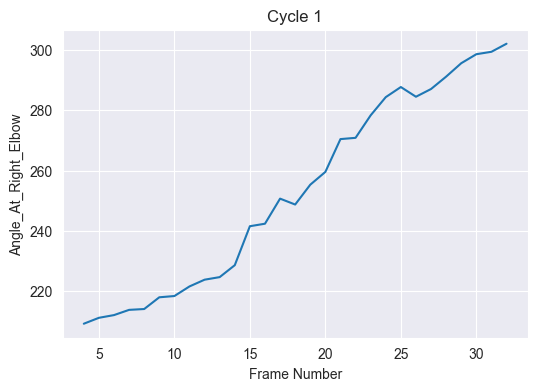

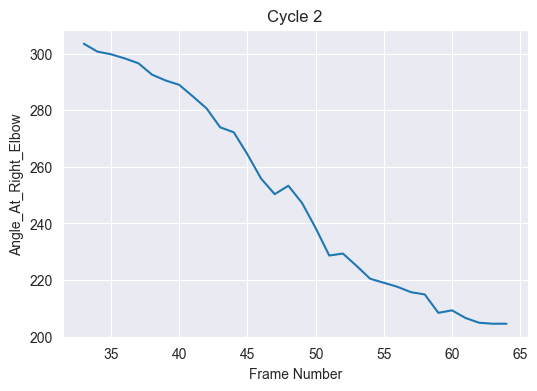

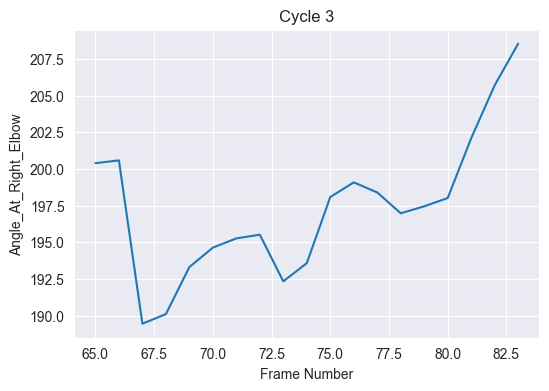

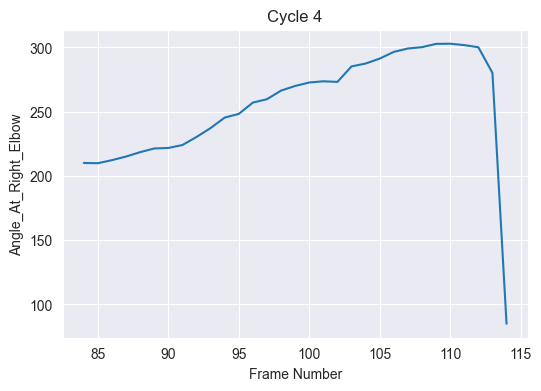

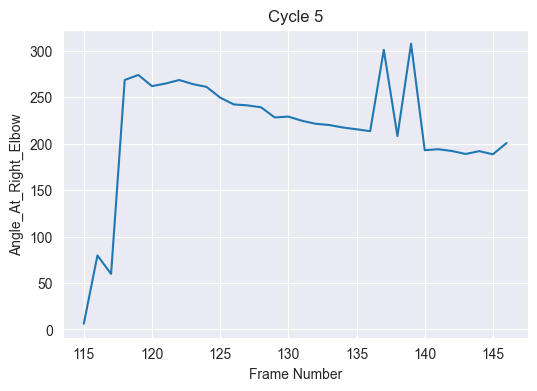

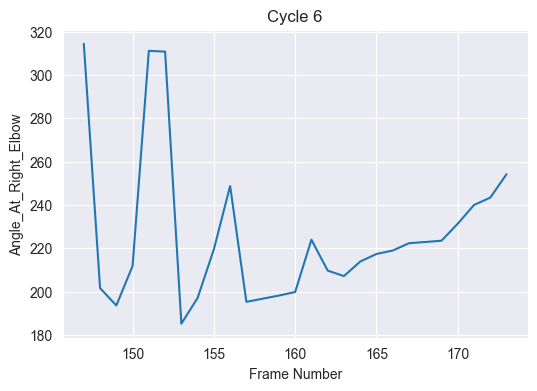

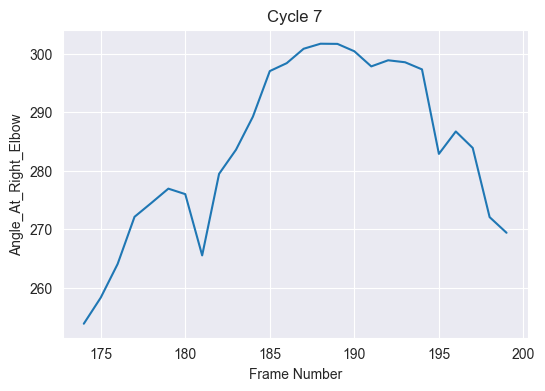

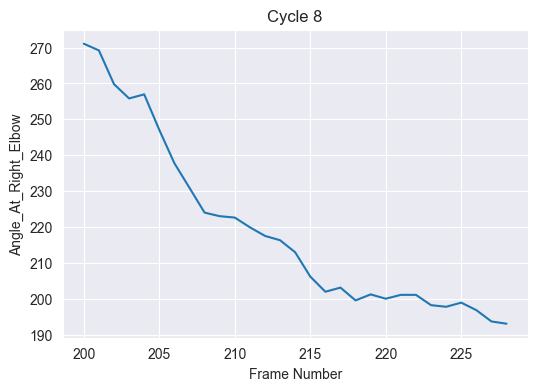

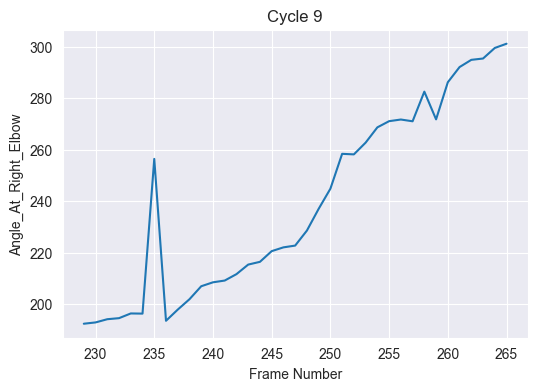

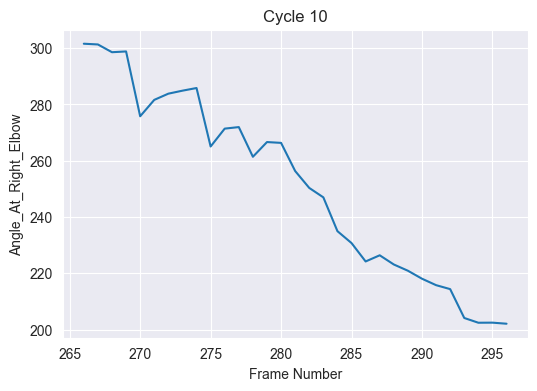

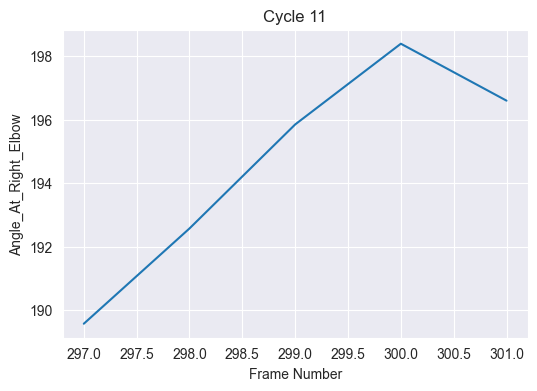

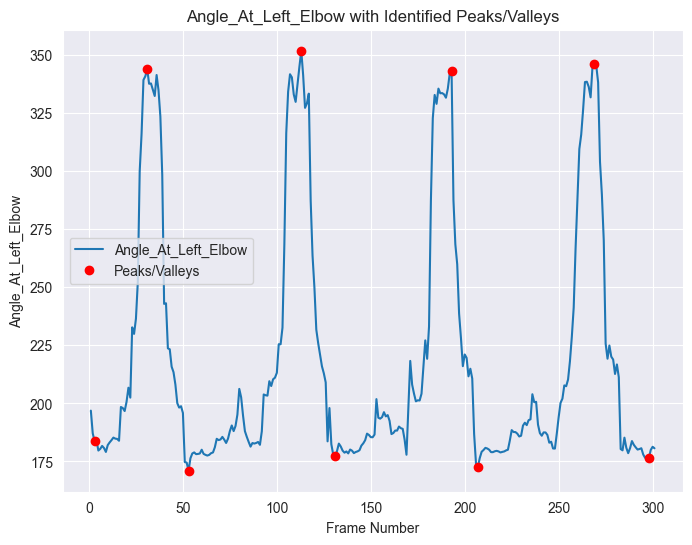

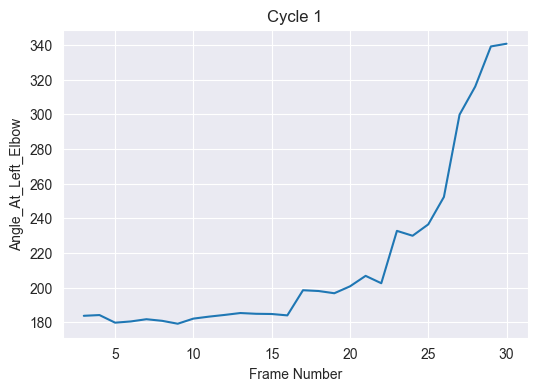

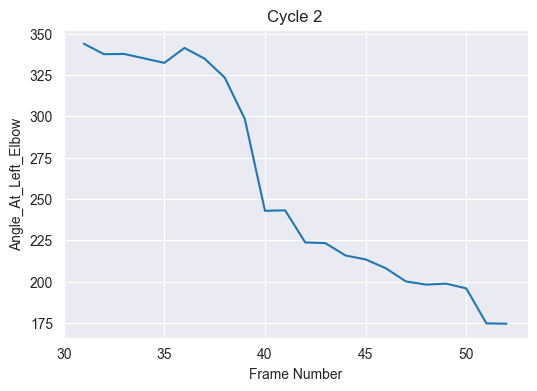

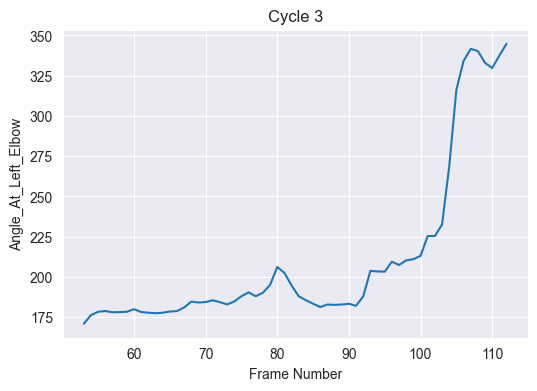

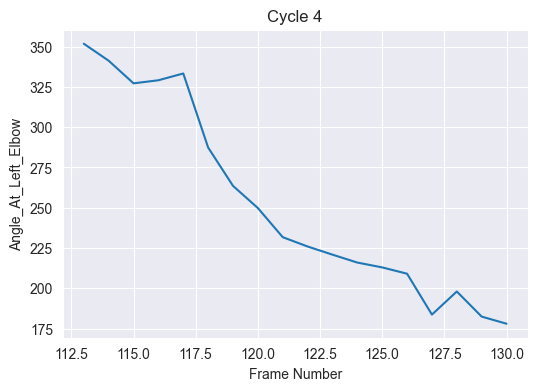

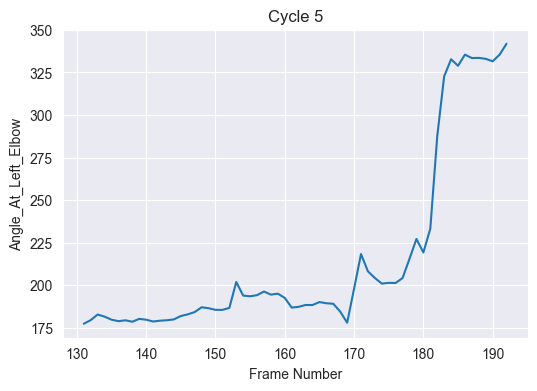

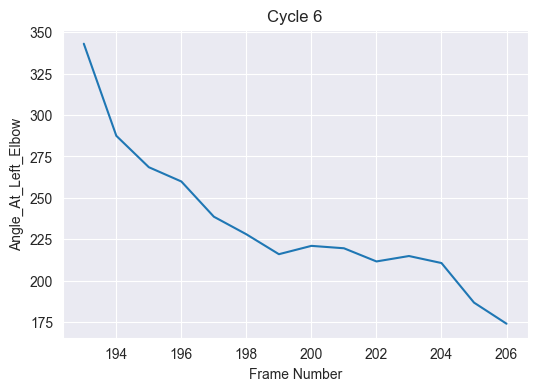

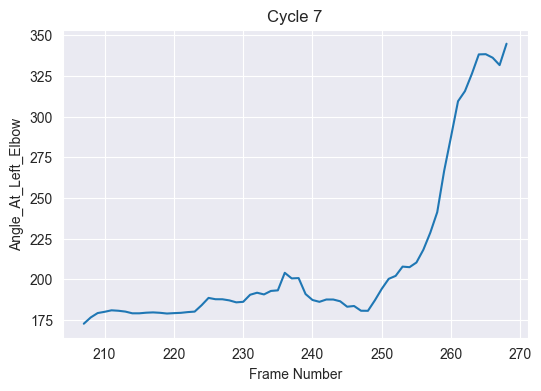

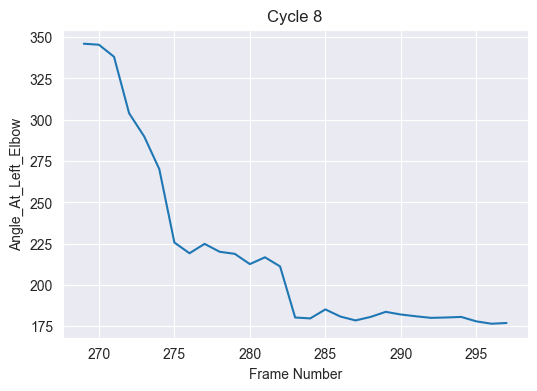

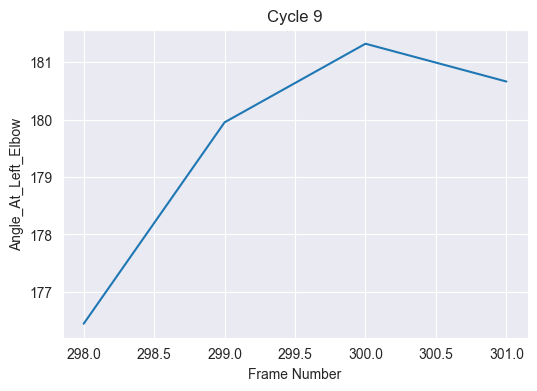

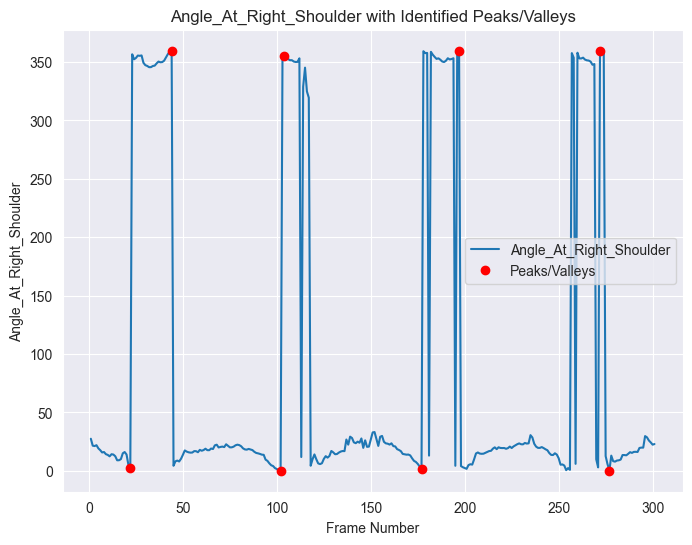

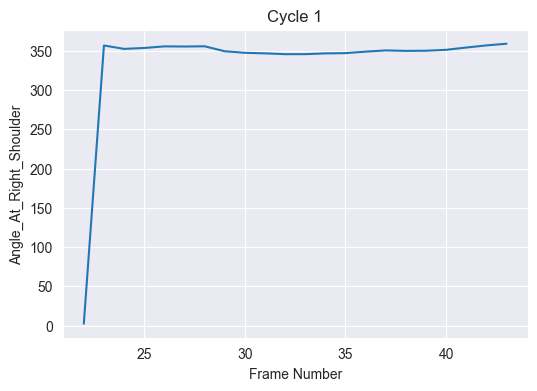

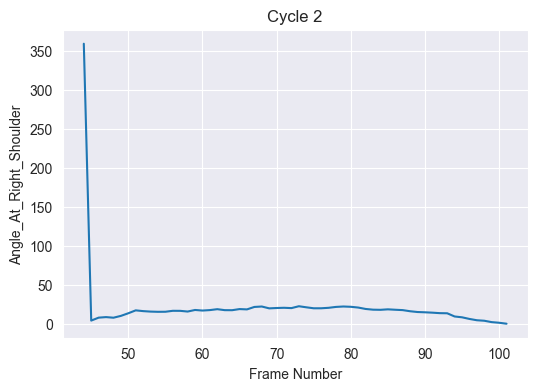

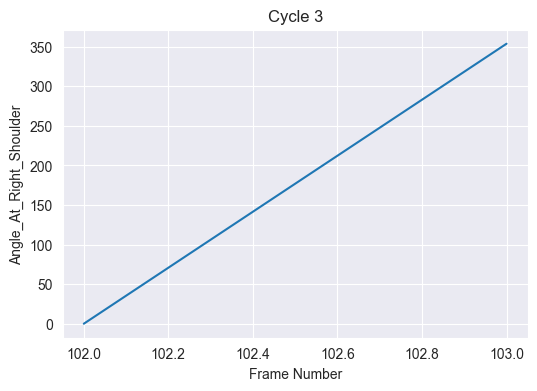

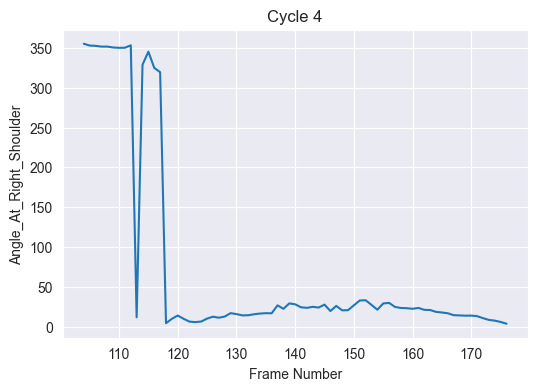

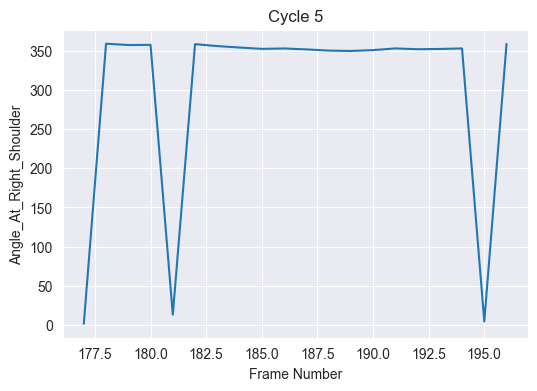

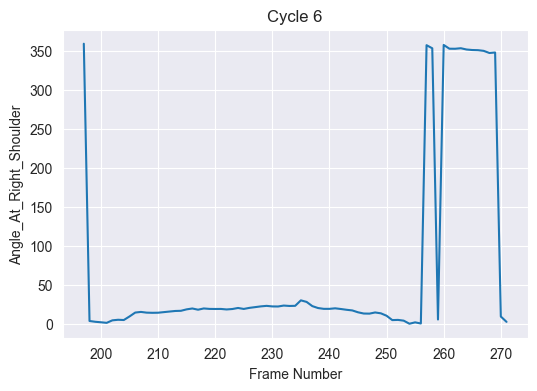

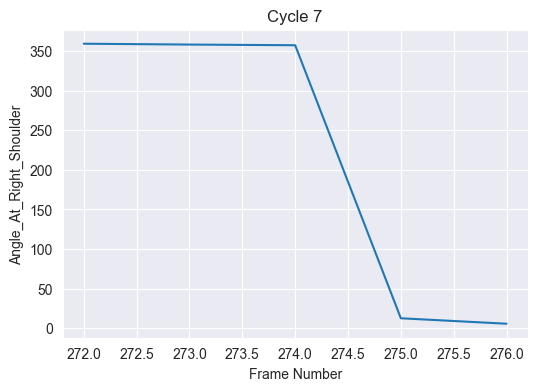

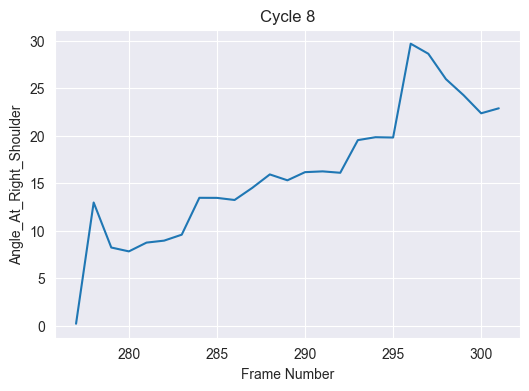

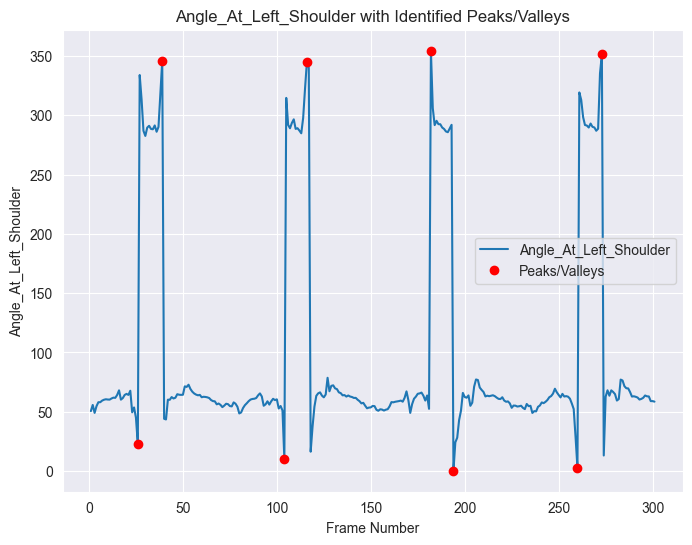

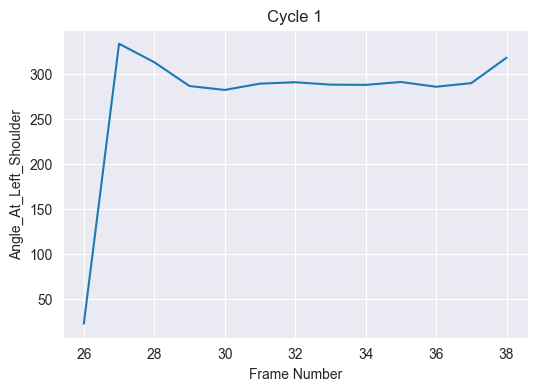

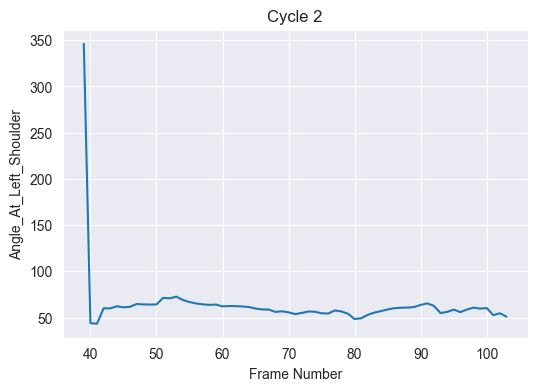

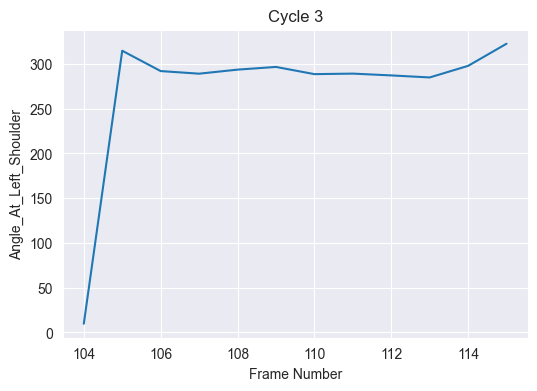

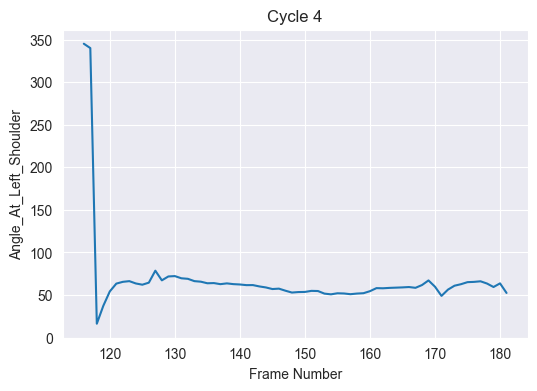

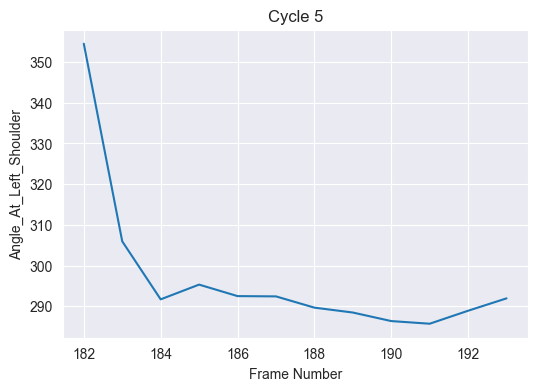

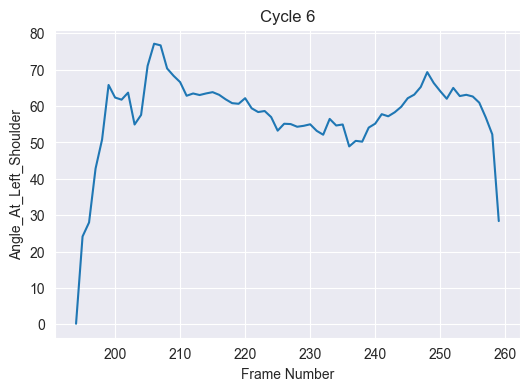

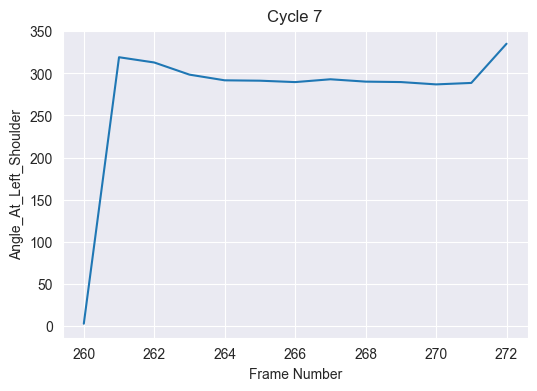

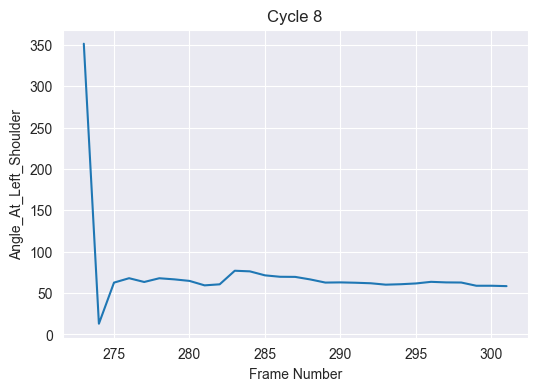

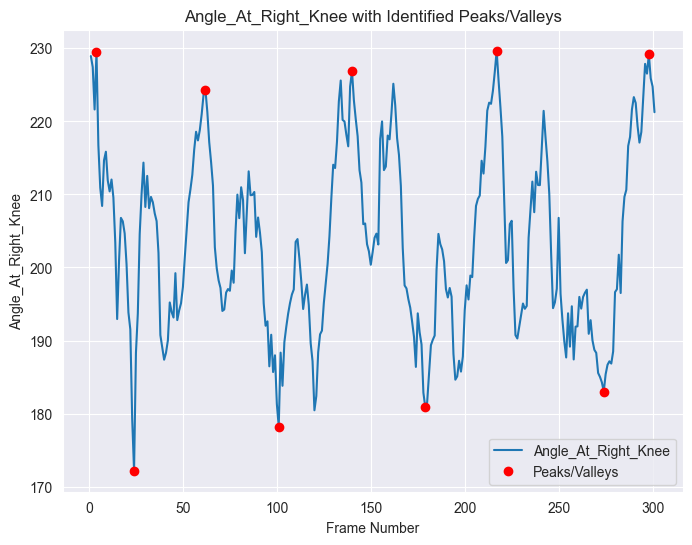

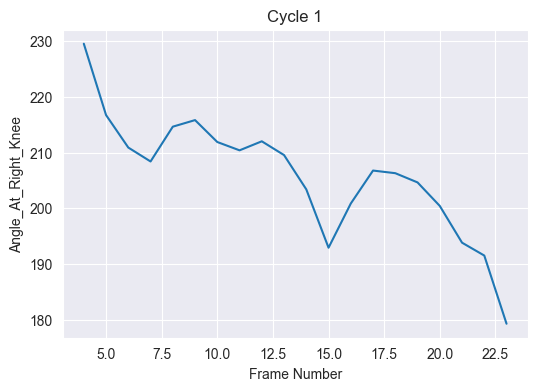

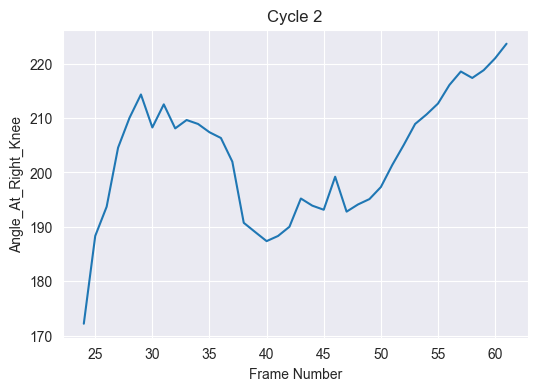

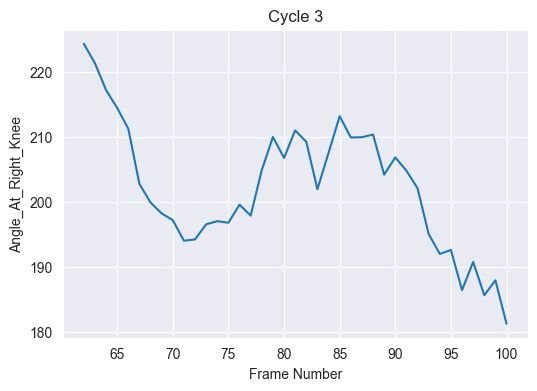

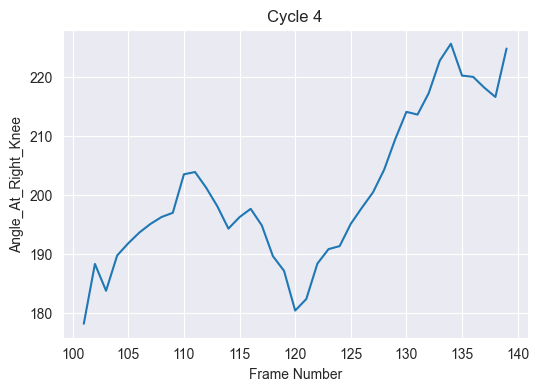

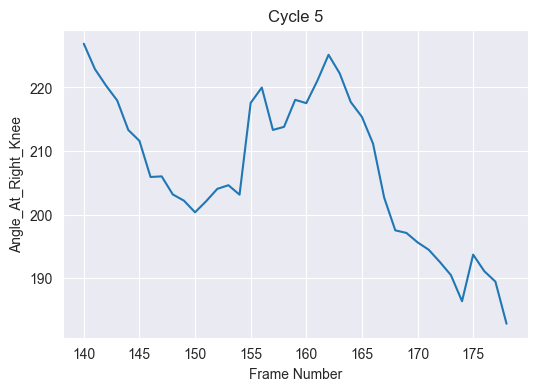

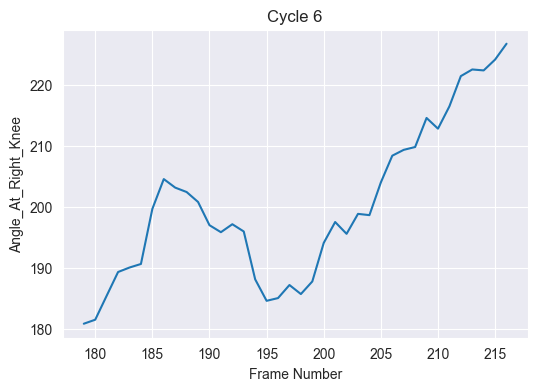

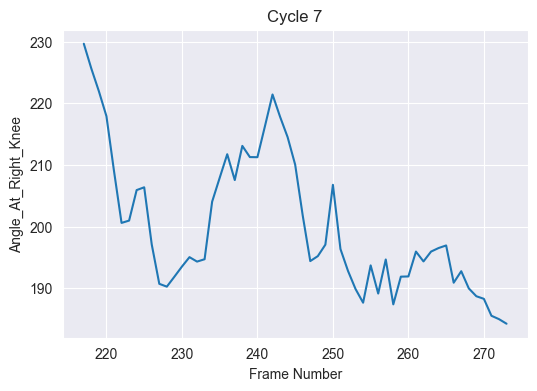

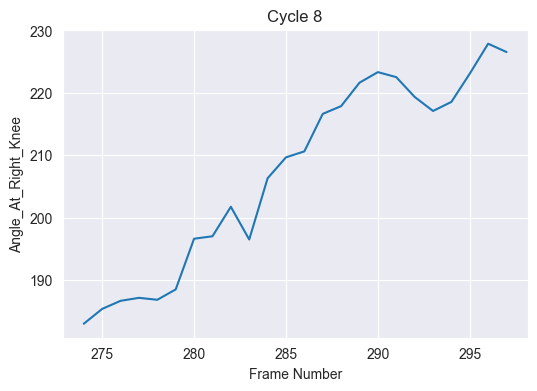

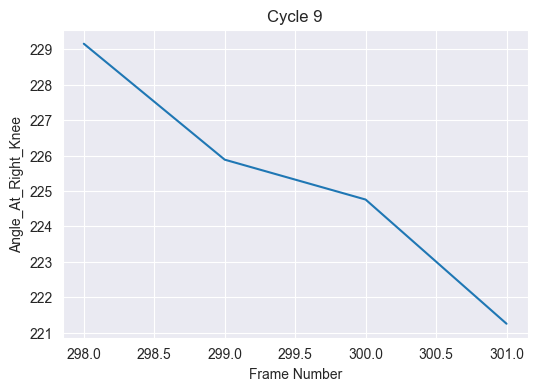

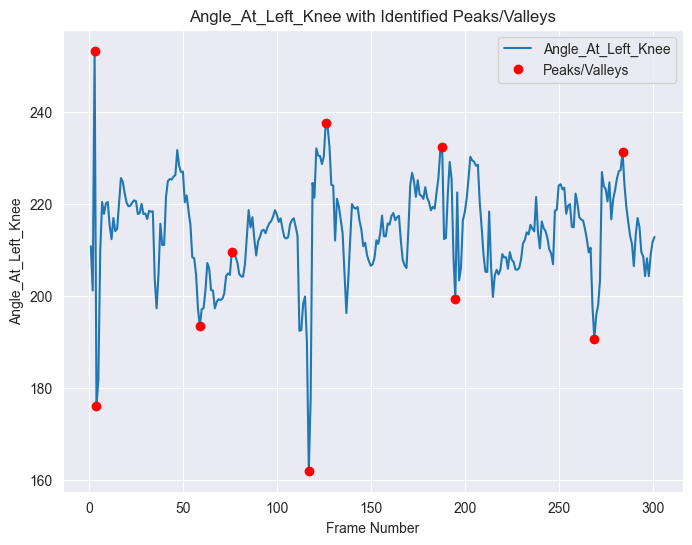

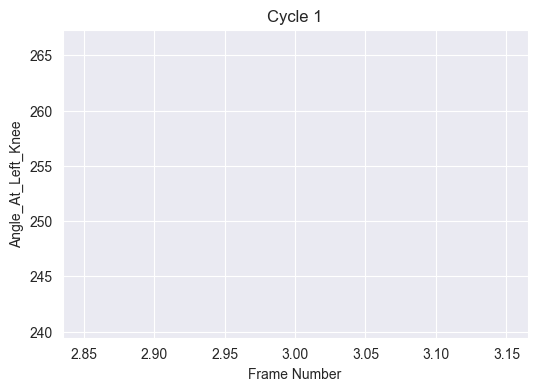

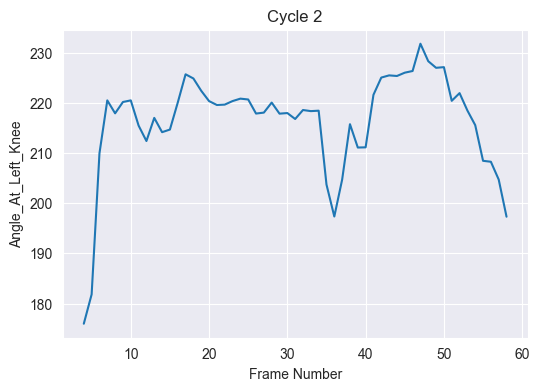

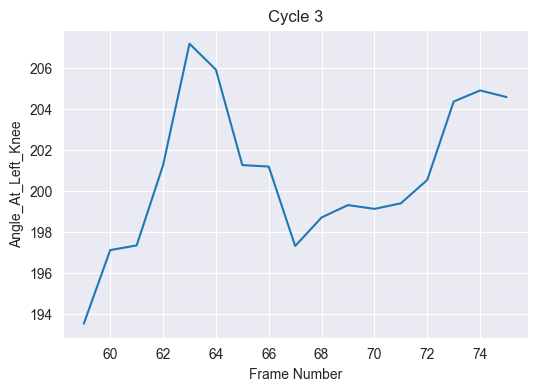

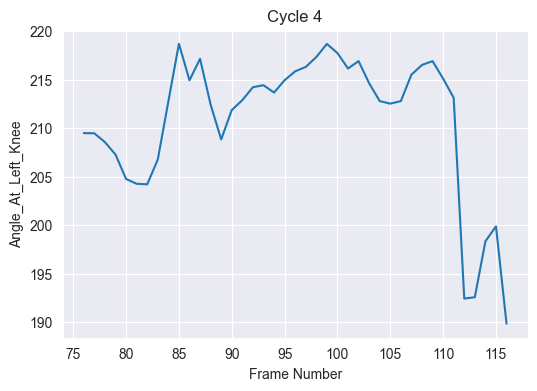

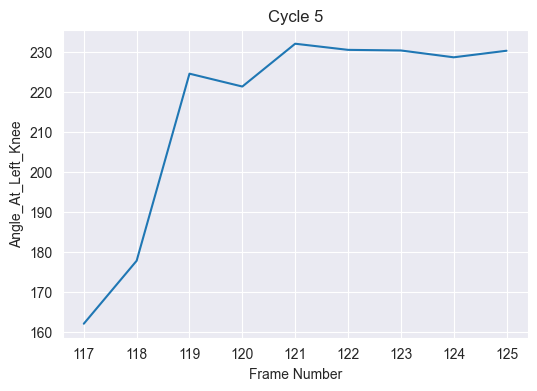

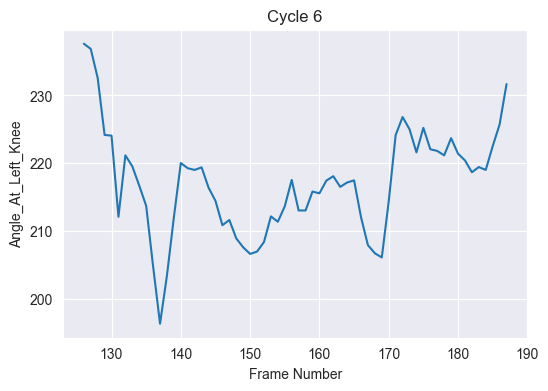

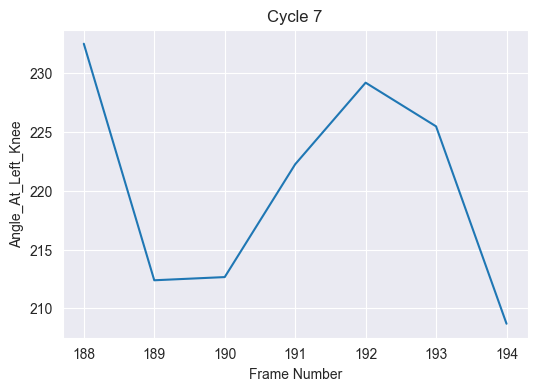

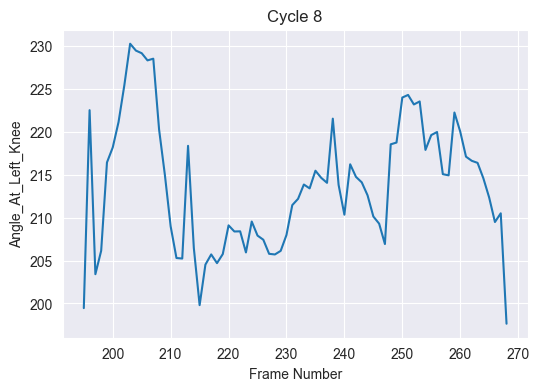

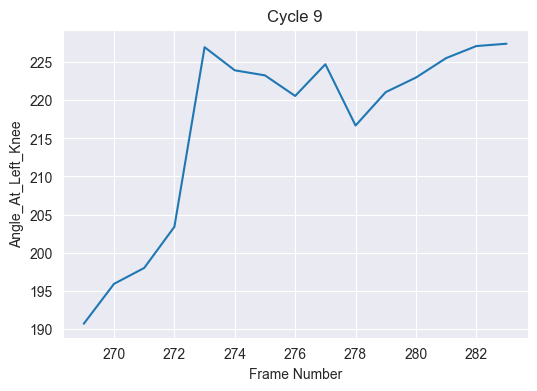

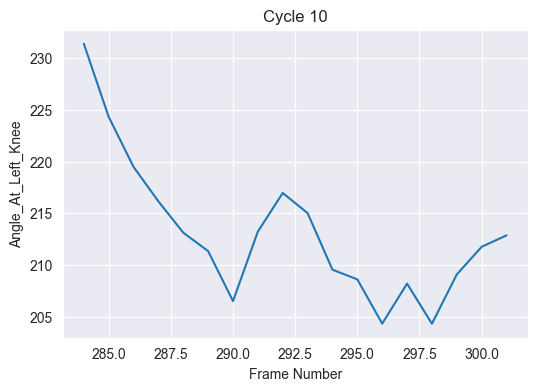

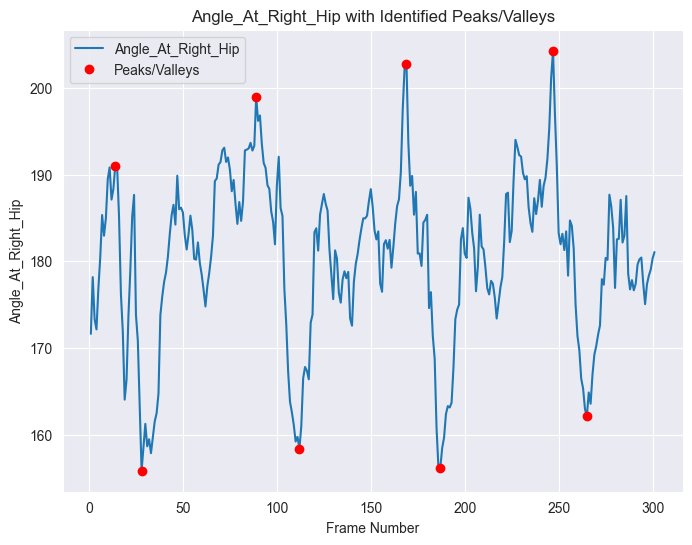

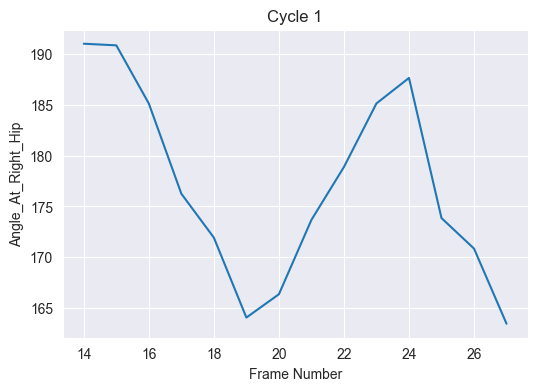

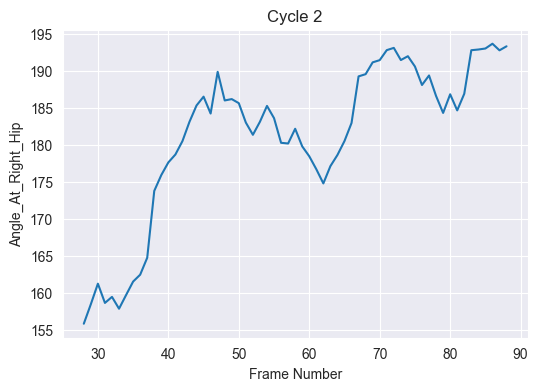

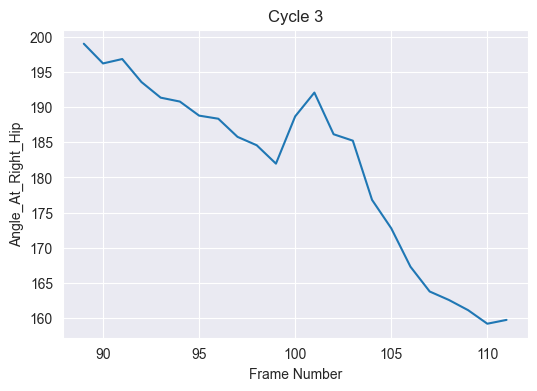

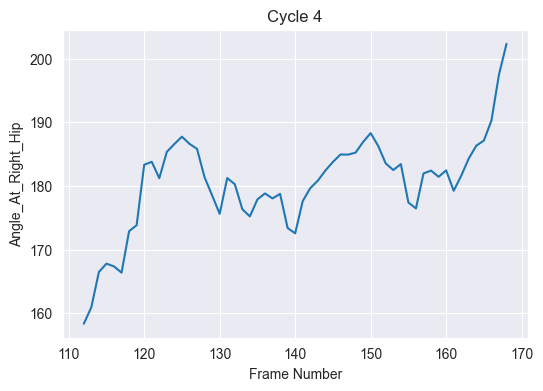

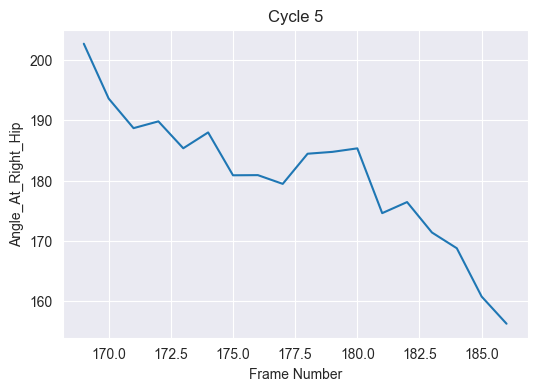

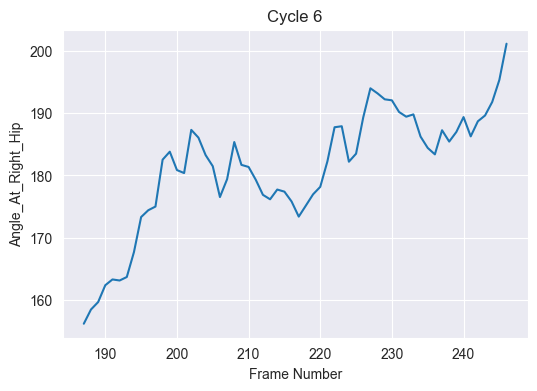

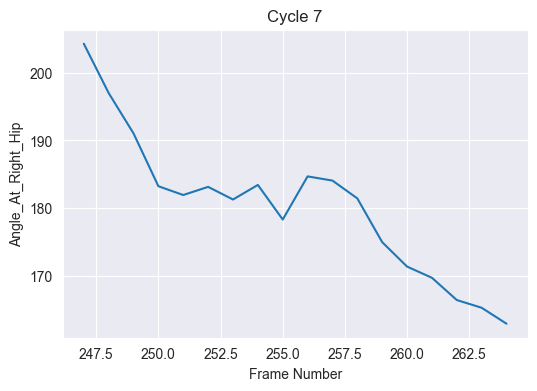

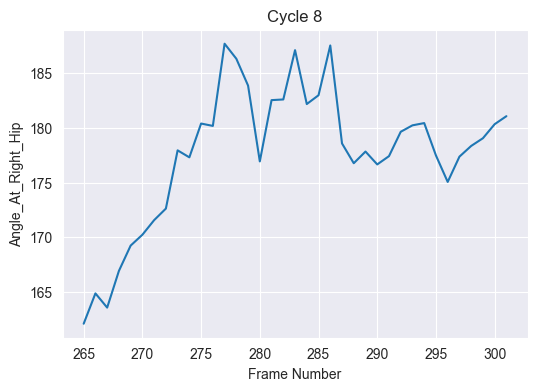

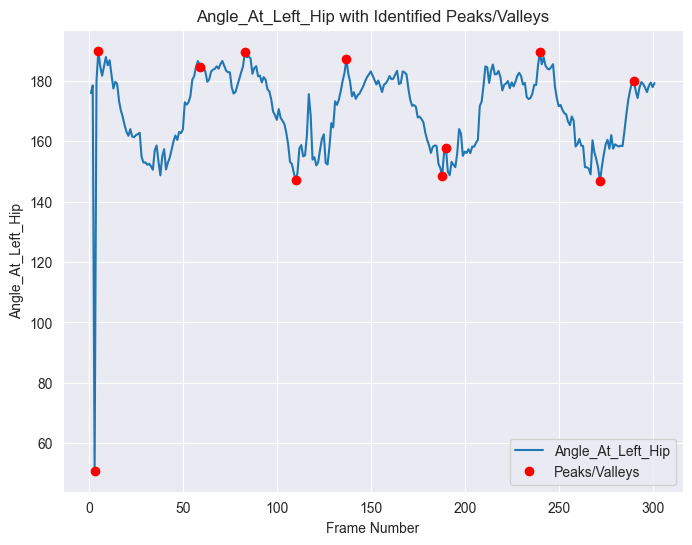

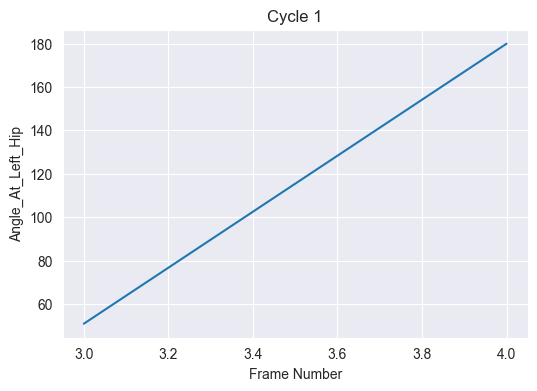

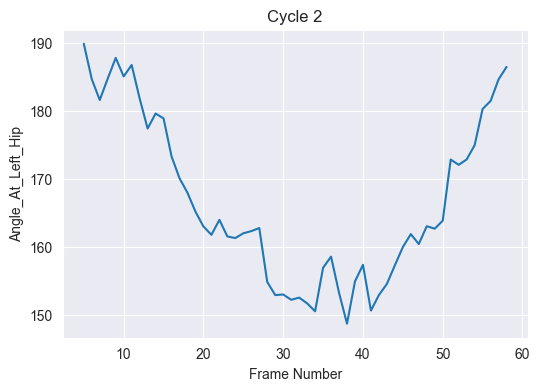

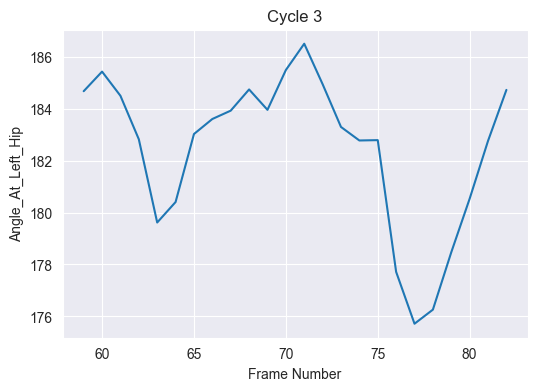

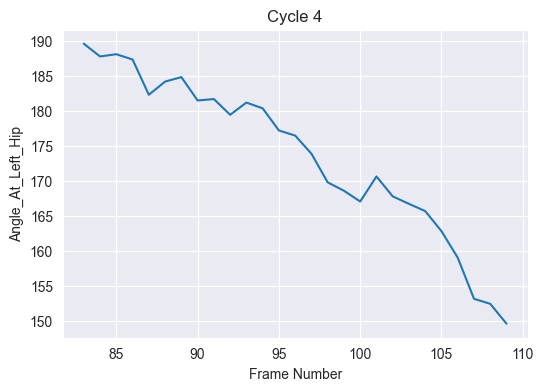

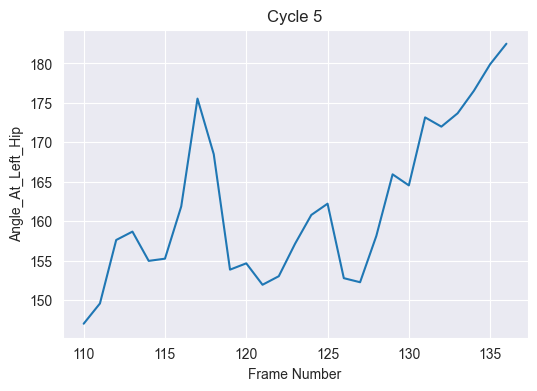

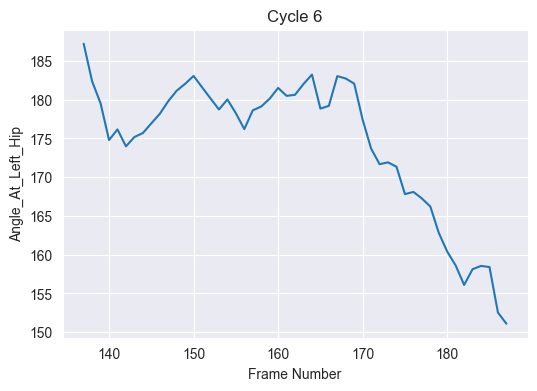

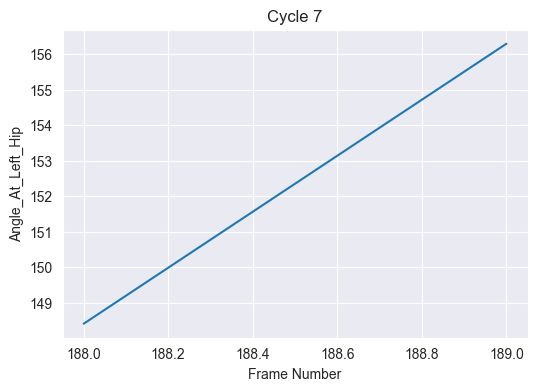

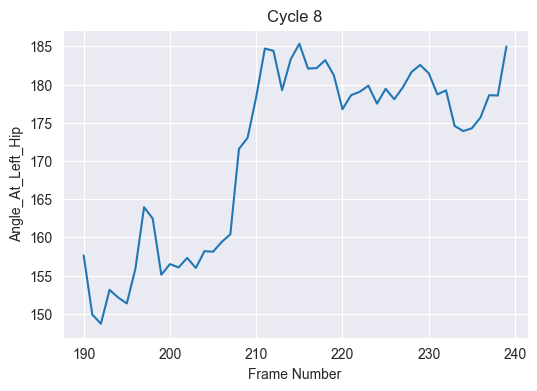

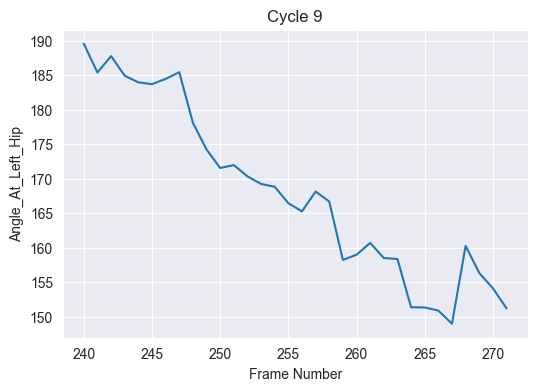

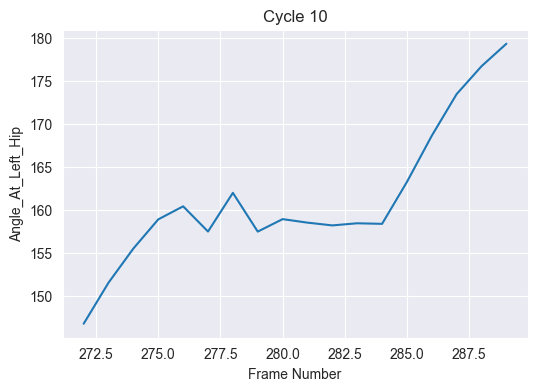

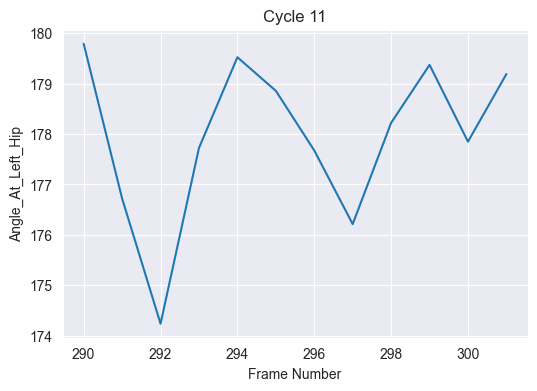

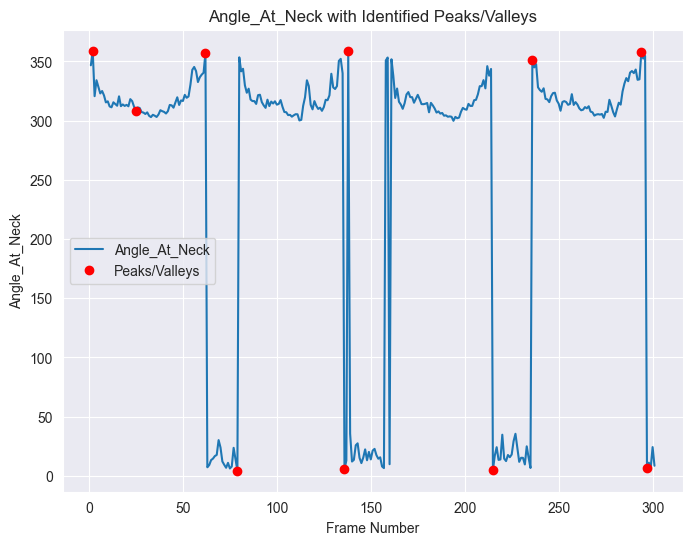

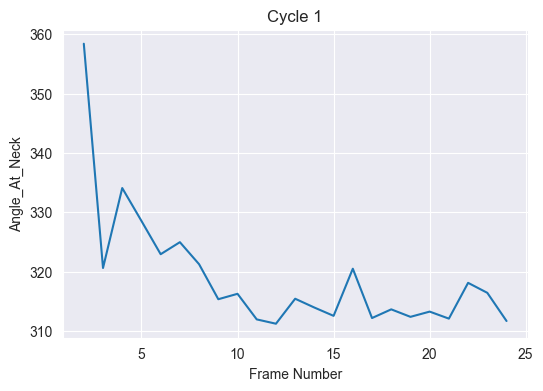

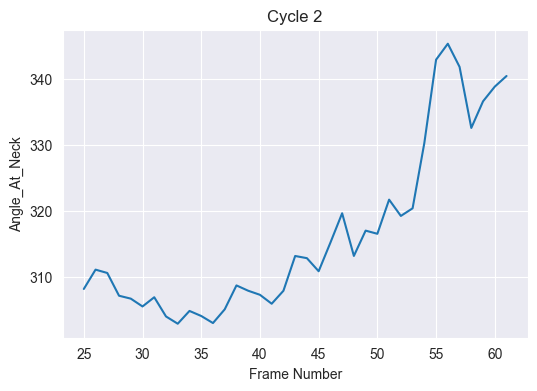

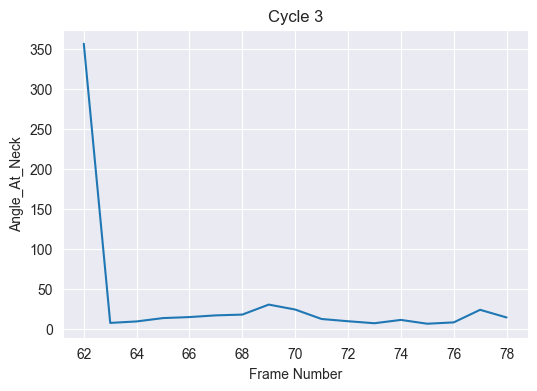

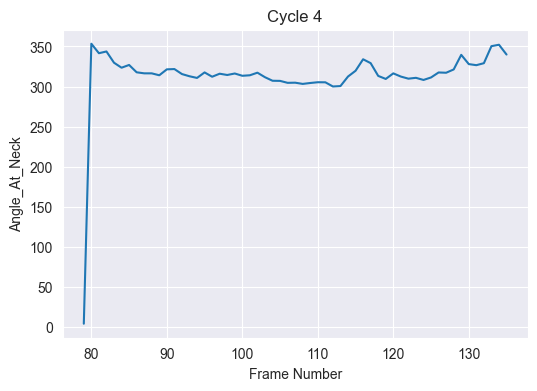

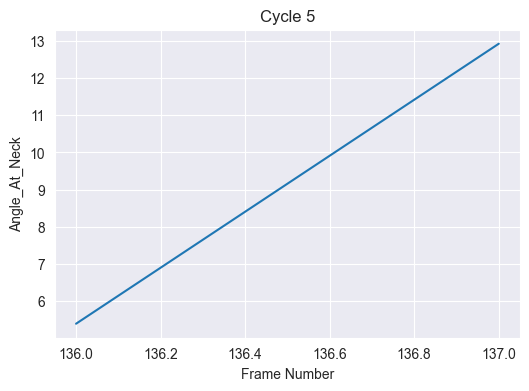

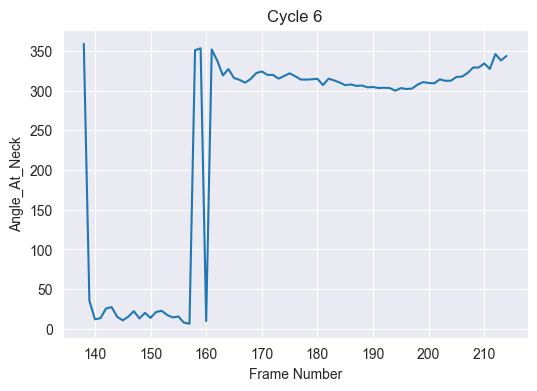

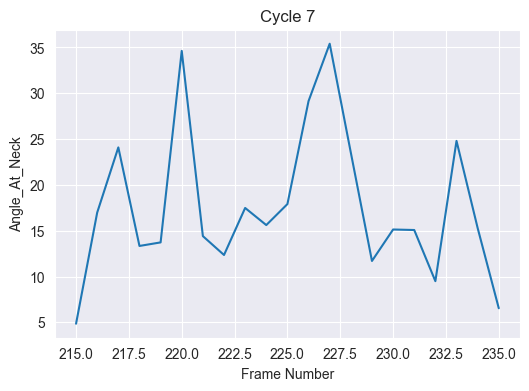

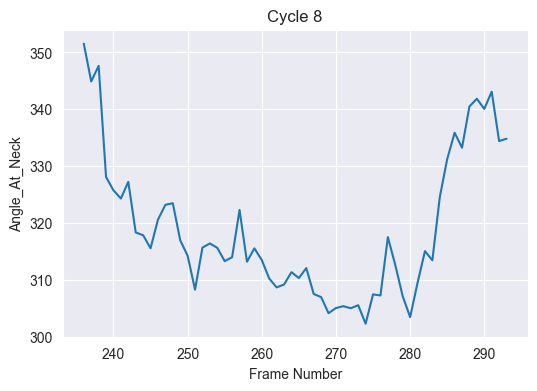

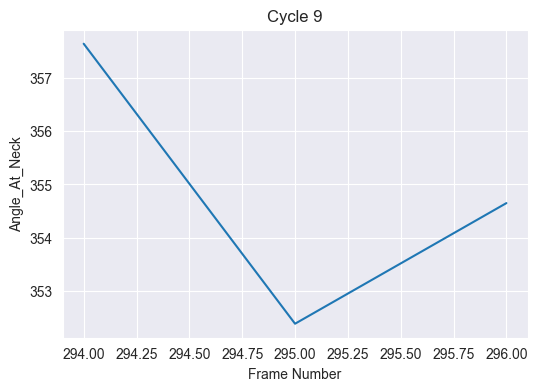

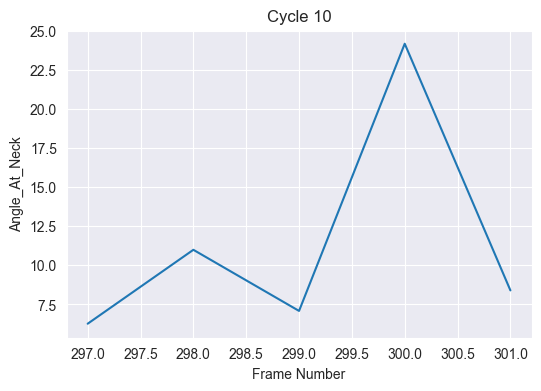

In [10]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame named Angles_df with 'Frame_Number' and other columns

# Define the column to be processed
columns = Angles_df.columns  # Change this to the desired column name

for column_to_process in columns:
    # Extract Frame_Number and the selected column
    frame_numbers = Angles_df['Frame_Number'].values
    selected_column = Angles_df[column_to_process].values
    
    # Find peaks (both peaks and valleys)
    peaks, _ = find_peaks(selected_column, distance=50)
    valleys, _ = find_peaks(-selected_column, distance=50)
    
    # Combine peaks and valleys to get all extremums
    extremums = np.sort(np.concatenate((peaks, valleys)))
    
    # Plot the original data and the identified peaks/valleys
    plt.figure(figsize=(8, 6))
    plt.plot(frame_numbers, selected_column, label=f'{column_to_process}')
    plt.plot(frame_numbers[extremums], selected_column[extremums], 'ro', label='Peaks/Valleys')
    plt.title(f'{column_to_process} with Identified Peaks/Valleys')
    plt.xlabel('Frame Number')
    plt.ylabel(column_to_process)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Separate cycles based on identified peaks/valleys
    cycle_frames = []
    cycle_values = []
    for i in range(len(extremums) - 1):
        start_idx = extremums[i]
        end_idx = extremums[i + 1]
        
        cycle_frame_numbers = frame_numbers[start_idx:end_idx]
        cycle_data = selected_column[start_idx:end_idx]
        
        cycle_frames.append(cycle_frame_numbers)
        cycle_values.append(cycle_data)
    
    # Include the last cycle (from the last extremum to the end of the signal)
    try:
        last_cycle_frames = frame_numbers[extremums[-1]:]
        last_cycle_values = selected_column[extremums[-1]:]
    except:
        continue
    
    cycle_frames.append(last_cycle_frames)
    cycle_values.append(last_cycle_values)
    
    # Visualize the segmented cycles
    for i in range(len(cycle_frames)):
        plt.figure(figsize=(6, 4))
        plt.plot(cycle_frames[i], cycle_values[i])
        plt.title(f'Cycle {i+1}')
        plt.xlabel('Frame Number')
        plt.ylabel(column_to_process)
        plt.grid(True)
        plt.show()


## Check DTW

In [11]:
def dtw_distance(s1, s2, limit_rows=None):
    # Calculate the Euclidean distance between two points
    def euclidean_distance(x, y):
        return np.sqrt(np.sum((x - y) ** 2))

    # Calculate the DTW distance between two sequences with a limit on rows
    def calculate_dtw_distance(s1, s2, limit_rows=None):
        if limit_rows is not None:
            s1 = s1[:limit_rows]
            s2 = s2[:limit_rows]

        dtw_matrix = np.zeros((len(s1) + 1, len(s2) + 1))

        for i in range(len(s1) + 1):
            for j in range(len(s2) + 1):
                dtw_matrix[i][j] = np.inf

        dtw_matrix[0][0] = 0

        for i in range(1, len(s1) + 1):
            for j in range(1, len(s2) + 1):
                cost = euclidean_distance(s1[i - 1], s2[j - 1])
                dtw_matrix[i][j] = cost + min(dtw_matrix[i - 1][j], dtw_matrix[i][j - 1], dtw_matrix[i - 1][j - 1])

        return dtw_matrix[len(s1)][len(s2)]

    return calculate_dtw_distance(s1, s2, limit_rows)


# Example pandas DataFrames
# Replace df1 and df2 with your own datasets

df1 = pd.DataFrame(pd.read_excel('Datasets/angles_data_PushUp.xlsx'))
df2 = pd.DataFrame(pd.read_excel('Datasets/angles_data_PushUp2.xlsx'))

columns_to_check = df1.columns
columns_to_check2 = df2.columns

df1 = advanced_smoothing(df1, column_names=df1.columns, window_length=2, polyorder=1)
df2 = advanced_smoothing(df2, column_names=df2.columns, window_length=2, polyorder=1)

# Remove outliers from the specified columns
df1 = remove_outliers(df1.copy(), columns_to_check)
df2 = remove_outliers(df2.copy(), columns_to_check2)

# Set the number of rows to consider (e.g., 100 rows)
rows_to_consider = 100

# Calculate DTW for all columns index-wise with a limit on rows
dtw_distances = {}

for col in df1.columns:
    dist = dtw_distance(df1[col].values.reshape(-1, 1), df2[col].values.reshape(-1, 1), limit_rows=rows_to_consider)
    dtw_distances[col] = dist

print("DTW Distances for each column:")
for k, v in dtw_distances.items():
    print(f'{k} : {v}')


DTW Distances for each column:
Frame_Number : 106.0
Angle_At_Right_Elbow : 10858.680967684715
Angle_At_Left_Elbow : 9855.191341555583
Angle_At_Right_Shoulder : 13824.09141819433
Angle_At_Left_Shoulder : 18047.4191142885
Angle_At_Right_Knee : 3044.561751111169
Angle_At_Left_Knee : 5721.078781978101
Angle_At_Right_Hip : 438.4280355007928
Angle_At_Left_Hip : 1208.0946170369427
Angle_At_Neck : 9495.242930620563
